**Kumpulan data ini menyediakan daftar lengkap bahan makanan bayi yang digunakan dalam produk makanan bayi yang tersedia secara komersial. Data dikumpulkan dari berbagai sumber, termasuk label makanan, situs web produsen, dan studi ilmiah**.

Kumpulan data berisi informasi tentang berbagai bahan makanan bayi, termasuk sereal, bubur, biji-bijian, susu, dan yogurt . Setiap bahan dicantumkan nama umum dan kandungan nutrisinya, termasuk makronutrien seperti protein, lemak, dan karbohidrat, serta mikronutrien seperti vitamin dan mineral.

Kumpulan data ini dimaksudkan untuk menjadi sumber bagi orang tua, pengasuh, ilmuwan data, dan peneliti yang tertarik untuk memahami bahan yang digunakan dalam produk makanan bayi dan potensi dampaknya terhadap kesehatan bayi.

Anda dapat Menggunakan kumpulan data ini untuk:

1. Pembersihan Data : Data Preprocessing
2. Analisis data : dataframe, hitung rata-rata quality dari 696 baris, Exploratory Data Analysis (EDA), corlelation quality distribution, corelation analysis, set score training dan testing, nilai aktual prediksi
3. Visualisasi data :  Heatmap corelation analysis , bar plot (quality), visualisasi histogram Analysis size komposisi dalam makanan bayi, visualisasi desicion tree, confusion matrix bentuk heatmap
4. Model classification : Model Desicion tree (model predictive struktur pohon)
5. Evaluation Model : evaluasi kinerja model decision tree, evaluasi perfoma model klasifikasi
6. Output Accuracy score : overfitting dan underfitting performa model Decision Tree (training testing), Accuracy Score Desicion Tree

**Importing libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from dtreeviz.trees import *

**Data Understanding: Data Frame**

In [2]:
df = pd.read_csv('../datasets/food_Ingredients.csv')
df.head(10).transpose().T.style.background_gradient(cmap="RdPu")

,Unnamed: 0,size,calories_kcal,fats_g,sod_mg,carb_g,fiber_g,sugar_g,protein_g,vitA_g,calcium_mg,thiamin_mg,zinc_mg,potassium_mg,magnesium_mg,vitE_mg,vitK_mcg,vitC_mg,vitB6_mg,copper_mg,carotene_mg,carotene_mcg,cryptoxanthin_mcg,lycopene_mcg,cholesterol_mg,quality
0,0.000000,1.000000,21.260000,0.200000,8.790000,4.450000,0.000000,2.690000,0.370000,0.000000,1.700000,0.070000,2.130000,13.610000,3.120000,0.030000,0.170000,6.950000,0.070000,0.020000,3.400000,1.980000,1.130000,0.000000,0.000000,1.000000
1,1.000000,nan,82.490000,0.790000,2.260000,17.400000,0.900000,11.850000,1.470000,33.900000,10.170000,0.470000,0.400000,53.110000,12.430000,0.180000,2.490000,24.630000,0.230000,0.080000,14.690000,2.260000,9.040000,0.000000,0.000000,0.000000
2,2.000000,1.000000,20.700000,0.200000,0.570000,4.370000,0.230000,2.970000,0.370000,8.510000,2.550000,0.120000,0.100000,13.320000,3.120000,0.050000,0.620000,6.180000,0.060000,0.020000,3.690000,0.570000,2.270000,0.000000,0.000000,1.000000
3,3.000000,1.000000,32.890000,1.160000,13.040000,4.340000,0.310000,0.000000,1.420000,29.770000,62.370000,0.140000,0.260000,57.830000,9.920000,0.000000,0.000000,0.370000,0.020000,0.030000,0.000000,0.000000,0.000000,0.000000,3.120000,3.000000
4,4.000000,1.000000,58.950000,0.900000,17.850000,11.010000,0.780000,2.060000,1.800000,10.350000,97.650000,0.540000,0.280000,109.650000,17.700000,0.750000,0.450000,0.700000,0.060000,0.060000,4.200000,4.050000,0.000000,0.000000,0.000000,1.000000
5,5.000000,1.000000,55.520000,0.990000,6.670000,9.840000,0.000000,0.000000,1.920000,3.270000,163.870000,0.390000,0.530000,36.780000,20.730000,0.000000,0.000000,0.000000,0.020000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
6,6.000000,1.000000,9.380000,0.170000,1.130000,1.660000,0.000000,0.000000,0.320000,0.550000,27.700000,0.070000,0.090000,6.220000,3.500000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
7,7.000000,1.000000,9.820000,0.150000,2.980000,1.840000,0.130000,0.340000,0.300000,1.720000,16.270000,0.090000,0.050000,18.270000,2.950000,0.120000,0.080000,0.120000,0.010000,0.010000,0.700000,0.680000,0.000000,0.000000,0.000000,3.000000
8,8.000000,1.000000,32.890000,1.080000,17.290000,4.540000,0.000000,0.000000,1.330000,28.070000,58.400000,0.180000,0.180000,70.020000,8.510000,0.000000,0.000000,0.450000,0.030000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
9,9.000000,1.000000,32.600000,1.110000,13.890000,4.340000,0.000000,0.000000,1.420000,0.000000,81.930000,0.140000,0.260000,48.200000,9.920000,0.000000,0.000000,0.000000,0.020000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [3]:
df.describe(include="all").T.style.background_gradient(cmap="RdPu")

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,696.000000,347.576149,201.184256,0.000000,173.750000,347.500000,521.250000,696.000000
size,534.000000,2.669663,3.616831,1.000000,1.000000,1.000000,4.000000,75.000000
calories_kcal,696.000000,55.430603,39.490081,3.330000,17.085000,56.410000,81.105000,196.940000
fats_g,696.000000,1.011394,1.591404,0.000000,0.110000,0.280000,1.440000,10.370000
sod_mg,696.000000,33.639756,76.437624,0.000000,3.070000,10.685000,28.900000,771.800000
carb_g,696.000000,10.251034,8.743263,0.000000,2.557500,8.755000,15.930000,40.260000
fiber_g,696.000000,1.111221,1.223094,0.000000,0.130000,0.540000,1.870000,6.120000
sugar_g,696.000000,4.559655,5.821021,0.000000,0.377500,2.220000,7.010000,30.410000
protein_g,696.000000,1.850589,2.537105,0.000000,0.230000,0.710000,2.480000,10.930000
vitA_g,696.000000,1289.485129,3046.760789,0.000000,15.300000,81.000000,930.597500,26454.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         696 non-null    int64  
 1   size               534 non-null    float64
 2   calories_kcal      696 non-null    float64
 3   fats_g             696 non-null    float64
 4   sod_mg             696 non-null    float64
 5   carb_g             696 non-null    float64
 6   fiber_g            696 non-null    float64
 7   sugar_g            696 non-null    float64
 8   protein_g          696 non-null    float64
 9   vitA_g             696 non-null    float64
 10  calcium_mg         696 non-null    float64
 11  thiamin_mg         696 non-null    float64
 12  zinc_mg            696 non-null    float64
 13  potassium_mg       696 non-null    float64
 14  magnesium_mg       696 non-null    float64
 15  vitE_mg            696 non-null    float64
 16  vitK_mcg           696 non

In [5]:
df.shape

(696, 26)

**Data Preprocessing, Data Preparation**

In [6]:
print(df.dtypes)

Unnamed: 0             int64
size                 float64
calories_kcal        float64
fats_g               float64
sod_mg               float64
carb_g               float64
fiber_g              float64
sugar_g              float64
protein_g            float64
vitA_g               float64
calcium_mg           float64
thiamin_mg           float64
zinc_mg              float64
potassium_mg         float64
magnesium_mg         float64
vitE_mg              float64
vitK_mcg             float64
vitC_mg              float64
vitB6_mg             float64
copper_mg            float64
carotene_mg          float64
carotene_mcg         float64
cryptoxanthin_mcg    float64
lycopene_mcg         float64
cholesterol_mg       float64
quality                int64
dtype: object


In [7]:
df.isnull().sum()

Unnamed: 0             0
size                 162
calories_kcal          0
fats_g                 0
sod_mg                 0
carb_g                 0
fiber_g                0
sugar_g                0
protein_g              0
vitA_g                 0
calcium_mg             0
thiamin_mg             0
zinc_mg                0
potassium_mg           0
magnesium_mg           0
vitE_mg                0
vitK_mcg               0
vitC_mg                0
vitB6_mg               0
copper_mg              0
carotene_mg            0
carotene_mcg           0
cryptoxanthin_mcg      0
lycopene_mcg           0
cholesterol_mg         0
quality                0
dtype: int64

In [8]:
# Mengisi nilai yang hilang dalam kolom 'size
df['size'].fillna(df['size'].mean(), inplace=True)
# Mencetak jumlah nilai yang hilang setelah pengisian
print(df.isnull().sum())

Unnamed: 0           0
size                 0
calories_kcal        0
fats_g               0
sod_mg               0
carb_g               0
fiber_g              0
sugar_g              0
protein_g            0
vitA_g               0
calcium_mg           0
thiamin_mg           0
zinc_mg              0
potassium_mg         0
magnesium_mg         0
vitE_mg              0
vitK_mcg             0
vitC_mg              0
vitB6_mg             0
copper_mg            0
carotene_mg          0
carotene_mcg         0
cryptoxanthin_mcg    0
lycopene_mcg         0
cholesterol_mg       0
quality              0
dtype: int64


In [9]:
df['quality'].value_counts()

3    236
0    212
1    142
2    106
Name: quality, dtype: int64

In [10]:
nutrient_columns = ['calories_kcal', 'fats_g', 'sod_mg', 'carb_g', 'fiber_g', 'sugar_g', 'protein_g',
                    'vitA_g', 'calcium_mg', 'thiamin_mg', 'zinc_mg', 'potassium_mg', 'magnesium_mg',
                    'vitE_mg', 'vitK_mcg', 'vitC_mg', 'vitB6_mg', 'copper_mg', 'carotene_mg',
                    'carotene_mcg', 'cryptoxanthin_mcg', 'lycopene_mcg', 'cholesterol_mg']

for col in nutrient_columns:

    print(df[col].value_counts())

46.33     14
58.75     13
71.19     12
64.41     10
66.67     10
          ..
60.45      1
9.94       1
15.60      1
10.95      1
108.80     1
Name: calories_kcal, Length: 342, dtype: int64
0.00    65
0.03    45
0.34    34
0.11    32
0.06    28
        ..
0.62     1
0.05     1
0.47     1
0.55     1
3.12     1
Name: fats_g, Length: 161, dtype: int64
2.26      22
22.60     16
3.40      14
1.42      14
0.57      14
          ..
124.80     1
44.80      1
104.90     1
117.60     1
6.24       1
Name: sod_mg, Length: 286, dtype: int64
0.00     36
12.20     9
8.70      8
0.07      8
7.67      6
         ..
9.10      1
1.30      1
7.19      1
2.92      1
2.00      1
Name: carb_g, Length: 368, dtype: int64
0.00    95
1.70    24
2.37    21
1.87    20
0.12    18
        ..
4.26     1
1.41     1
0.76     1
2.53     1
0.41     1
Name: fiber_g, Length: 127, dtype: int64
0.00     117
2.36       7
1.39       7
2.38       7
14.42      6
        ... 
13.16      1
12.88      1
2.76       1
1.17       1
0.

In [11]:
#Hitung rata-rata dan standar deviasi dari semua kolom
mean = df.mean()
std_dev = df.std()

# Mendefinisikan fungsi untuk mengidentifikasi outlier
def identify_outliers(row, n_sigmas=3):
    x = (row - mean).abs()
    return ((x / std_dev) > n_sigmas)

# Mengaplikasikan fungsi untuk dataframe
outliers = df.apply(identify_outliers)

# Menghapus outlier
df = df.loc[~outliers.any(axis=1)]

# Memverifikasi bentuk dataframe setelah menghapus outlier
print('Shape of the dataset after removing outliers:', df.shape)

Shape of the dataset after removing outliers: (696, 26)


**Exploratory Data Analysis (EDA)**

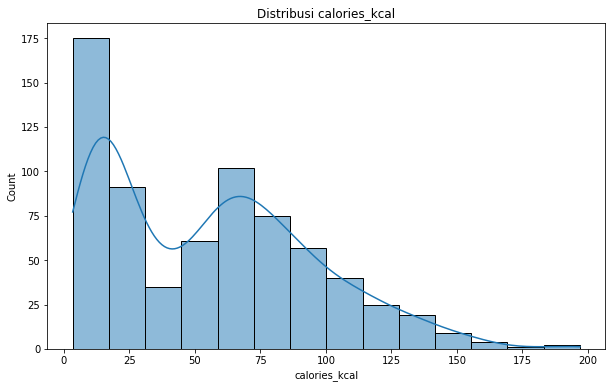

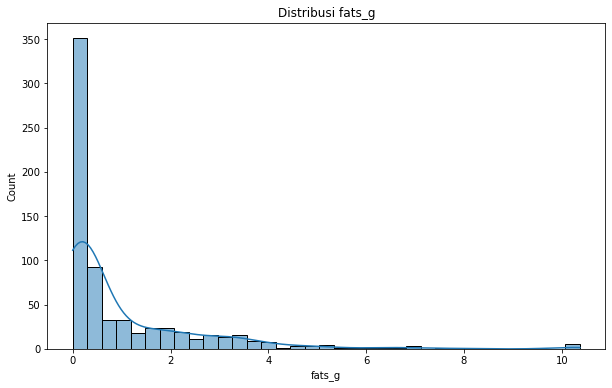

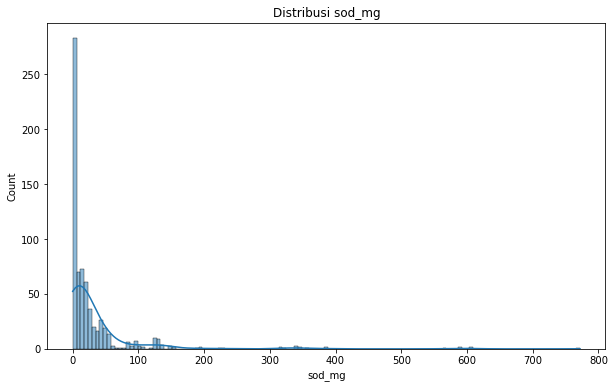

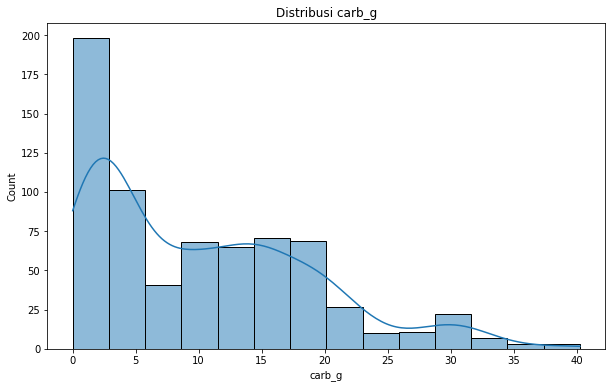

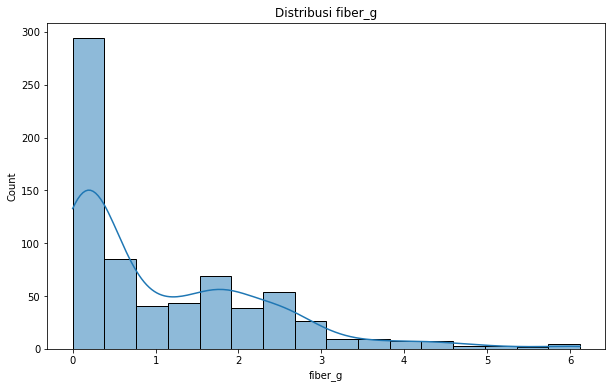

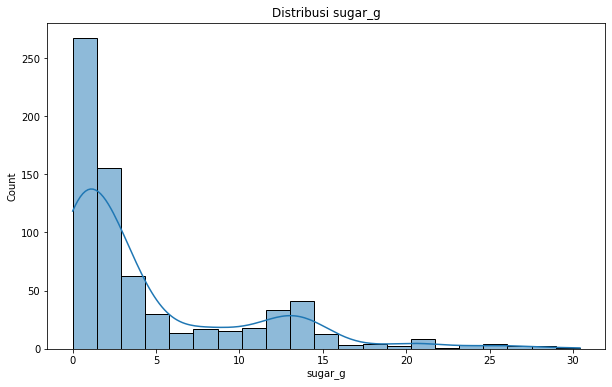

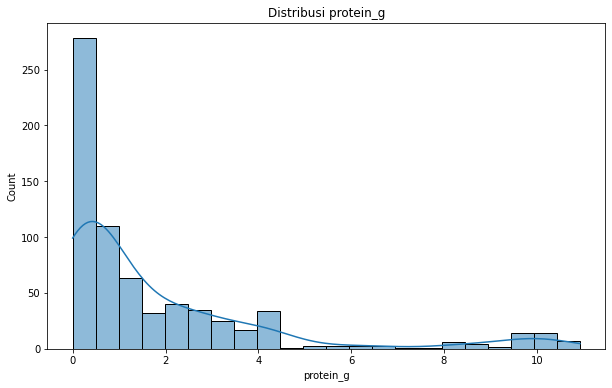

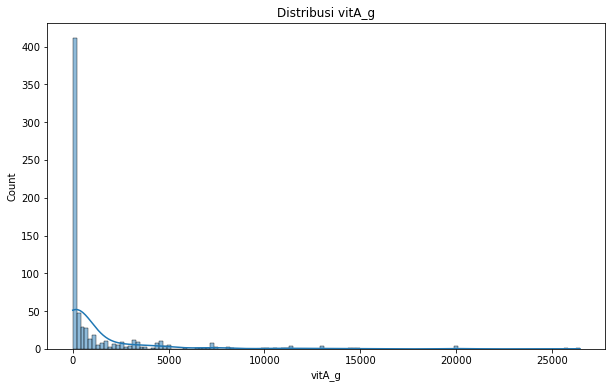

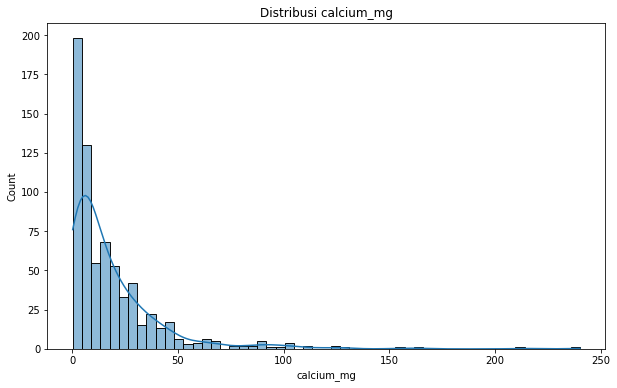

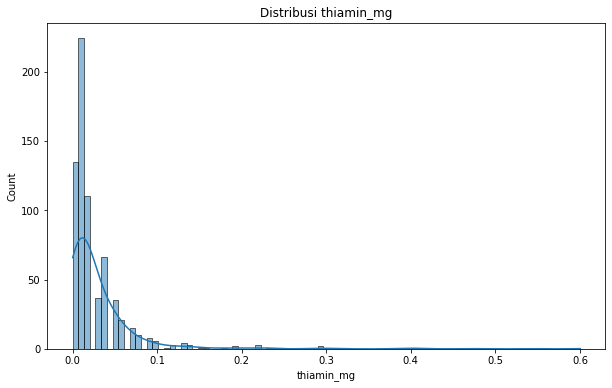

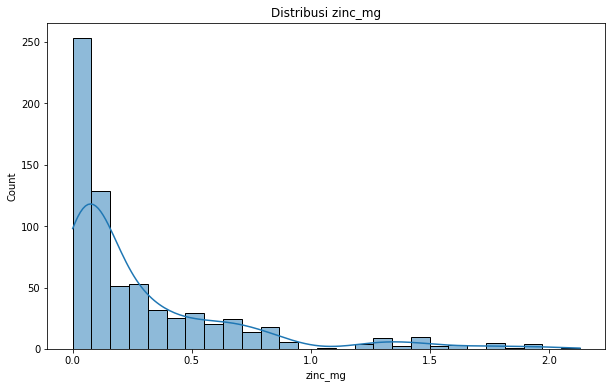

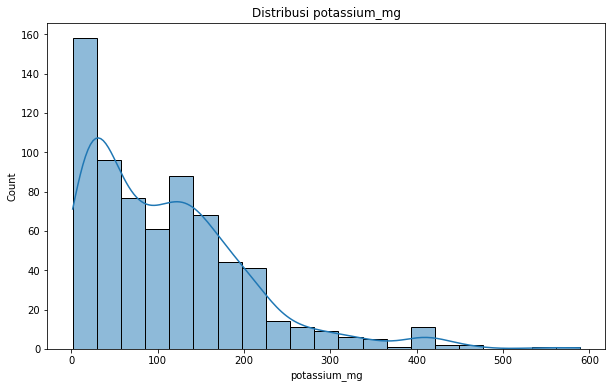

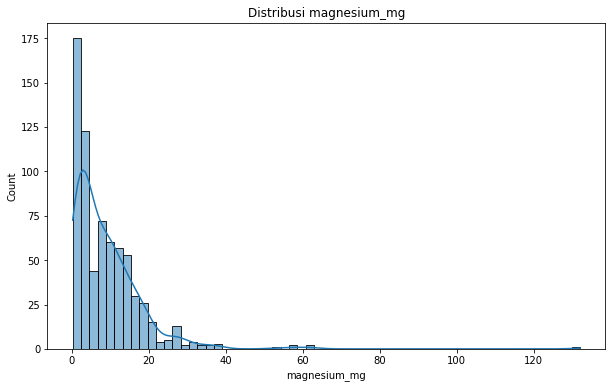

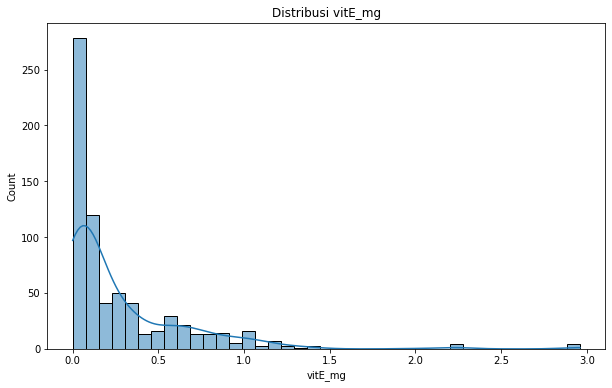

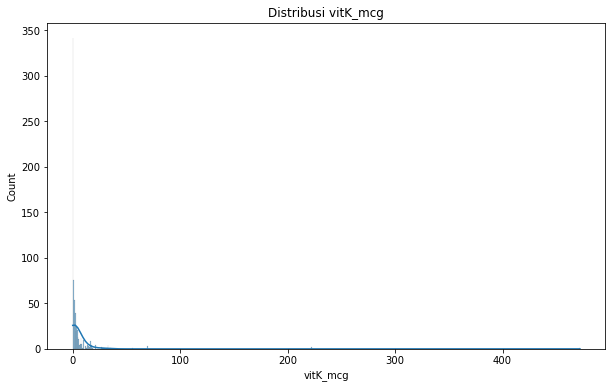

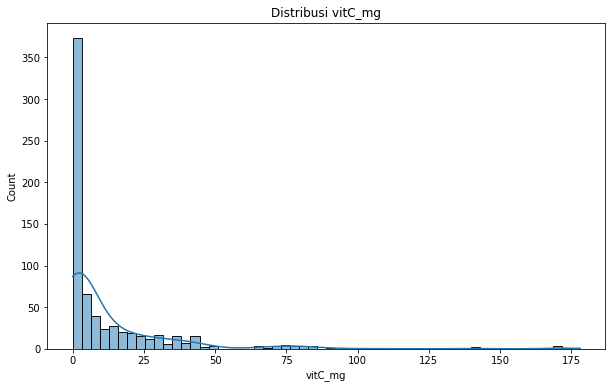

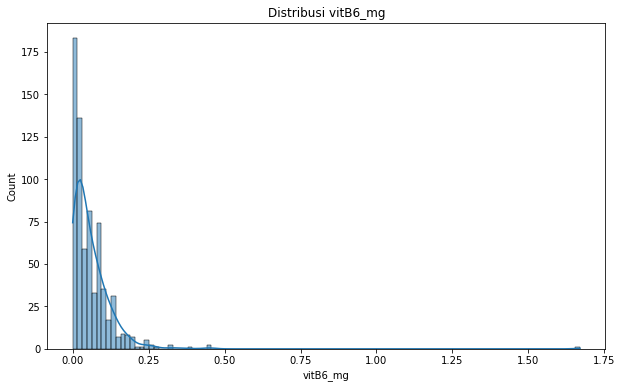

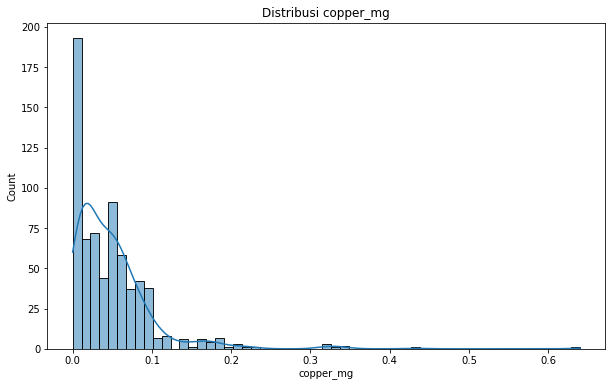

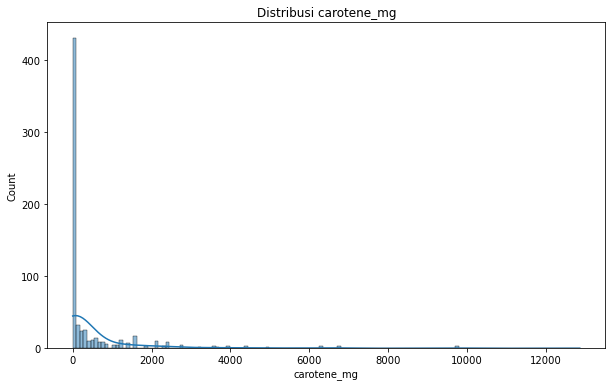

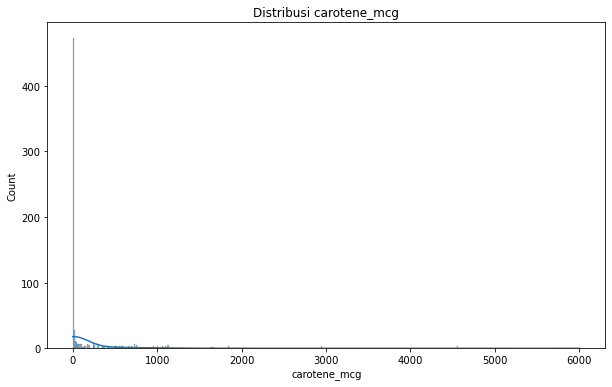

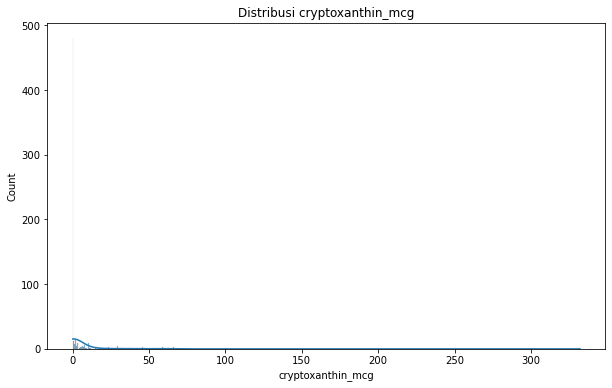

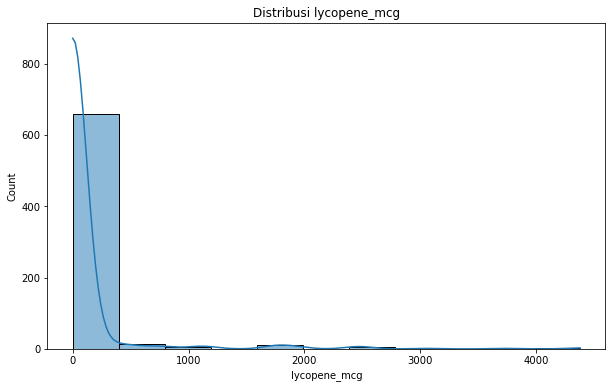

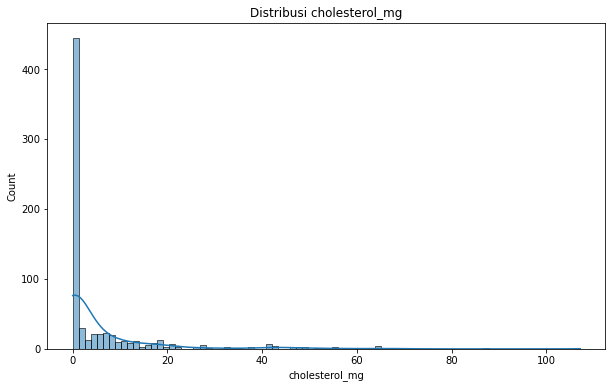

In [12]:
# Mendefinisikan kolom nutrisi, daftar yang berisi nama-nama kolom yang ingin kita buat histogramnya
nutrient_columns = ['calories_kcal', 'fats_g', 'sod_mg', 'carb_g', 'fiber_g', 'sugar_g', 'protein_g',
                    'vitA_g', 'calcium_mg', 'thiamin_mg', 'zinc_mg', 'potassium_mg', 'magnesium_mg', 
                    'vitE_mg', 'vitK_mcg', 'vitC_mg', 'vitB6_mg', 'copper_mg', 'carotene_mg', 
                    'carotene_mcg', 'cryptoxanthin_mcg', 'lycopene_mcg', 'cholesterol_mg']

# Membuat histogram, Menggunakan perulangan dari setiap kolom yang di masukan ke dalam nutrient_column
for column in nutrient_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

c:\Users\ROG G531\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


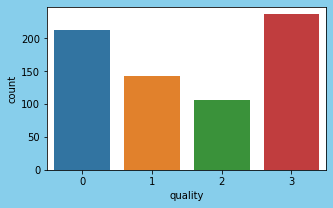

In [13]:
# menghasilkan grafik berbentuk bar plot yang menunjukkan distribusi jumlah data pada masing-masing kategori "quality". 
# Grafik ini berguna untuk memahami distribusi kategori pada kolom "quality" 
# memberikan gambaran awal tentang seberapa seimbang atau tidak seimbangnya data pada setiap kategori
plt.figure(figsize=(5,3), facecolor='skyblue')
sns.countplot(df['quality'])
plt.xlabel('quality')
plt.ylabel('count')
plt.show()

In [14]:
# nilai rata-rata dari semua data yang terdapat dalam kolom "size"
df['size'].mean()


2.6696629213483205

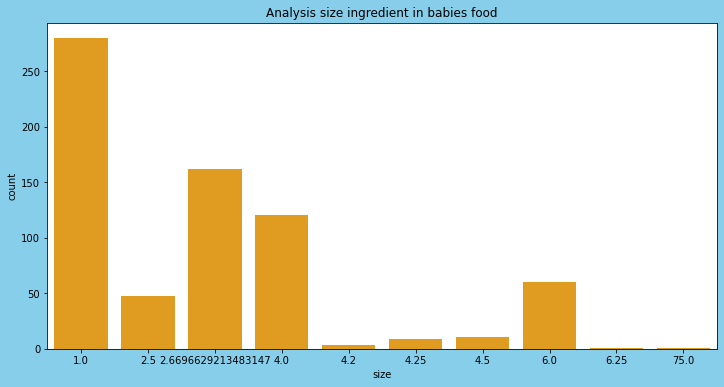

In [15]:
# bar pada grafik akan menunjukkan jumlah frekuensi masing-masing nilai pada kolom "size"
# melihat seberapa seimbang atau tidak seimbangnya distribusi nilai "size" dalam data makanan bayi
plt.figure(figsize=(12, 6), facecolor='skyblue')
sns.countplot(data=df, x='size', color='orange')
plt.title("Analysis size ingredient in babies food")
plt.show()

**Corlelation quality distribution**

In [16]:
# Hitung jumlah rata-rata nutrisi yang berbeda
# 1. Menghitung rata-rata nutrisi, df[nutrient_columns].mean()
# 2. Menyimpan rata-rata nutrisi, average_nutrients = rata-rata nutrisi
# 3. Mencetak rata-rata Nutrisi ,print(average_nutrients)
average_nutrients = df[nutrient_columns].mean()
print(average_nutrients)

calories_kcal          55.430603
fats_g                  1.011394
sod_mg                 33.639756
carb_g                 10.251034
fiber_g                 1.111221
sugar_g                 4.559655
protein_g               1.850589
vitA_g               1289.485129
calcium_mg             18.641825
thiamin_mg              0.030517
zinc_mg                 0.294914
potassium_mg          110.815589
magnesium_mg            8.923003
vitE_mg                 0.282730
vitK_mcg                4.619641
vitC_mg                12.801868
vitB6_mg                0.058937
copper_mg               0.049440
carotene_mg           638.581767
carotene_mcg          204.902802
cryptoxanthin_mcg       5.821307
lycopene_mcg           91.936997
cholesterol_mg          5.495330
dtype: float64


In [17]:
# Hitung kandungan nutrisi rata-rata untuk setiap tingkat kualitas
# melihat rata-rata nilai nutrisi untuk masing-masing kategori "quality" pada data makanan bayi
# Informasi ini tentang rata-rata kandungan nutrisi berbeda untuk setiap kategori kualitas
average_nutrients_by_quality = df.groupby('quality')[nutrient_columns].mean()
print(average_nutrients_by_quality)

         calories_kcal    fats_g     sod_mg     carb_g   fiber_g    sugar_g  \
quality                                                                       
0            79.618962  0.524858  20.188066  18.823019  1.705849  11.943443   
1            59.348380  1.201761  47.877746  10.562535  1.561127   2.927254   
2            43.660377  1.020849  31.733491   7.374340  1.202736   1.664245   
3            36.631398  1.329661  38.012754   3.655424  0.265254   0.209449   

         protein_g       vitA_g  calcium_mg  thiamin_mg  ...   vitE_mg  \
quality                                                  ...             
0         1.006792  1594.520849   21.398443    0.031132  ...  0.387594   
1         2.143662  2315.421690   23.898028    0.048028  ...  0.471620   
2         1.580094  1477.826226   18.403774    0.021981  ...  0.245849   
3         2.553729   313.575297   13.109831    0.023263  ...  0.091441   

         vitK_mcg    vitC_mg  vitB6_mg  copper_mg  carotene_mg  carotene_mcg  \


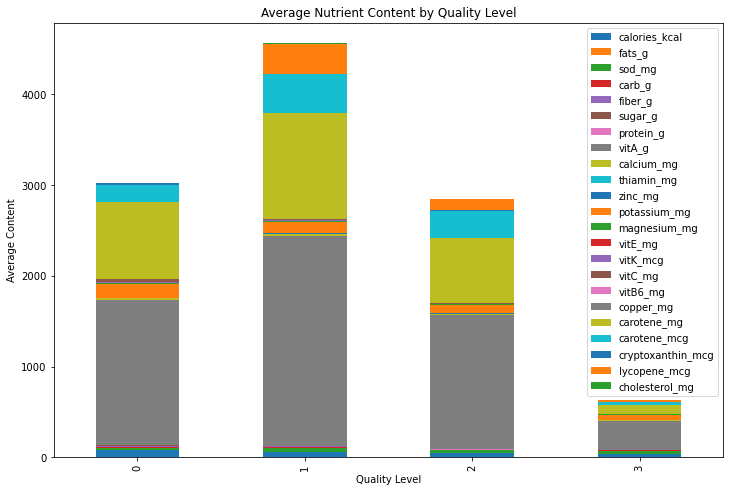

In [18]:
# Create a bar chart of the average nutrient content for each quality level
# Kandungan Gizi Rata-Rata Berdasarkan Tingkat Kualitas
# label "Quality Level" (X) merepresentasikan kategori "quality" pada makanan bayi.
# label "Average Content" (y) bahwa nilai yang ditampilkan  rata-rata kandungan nutrisi.
# membandingkan rata-rata kandungan nutrisi antara kategori "quality"
# perbedaan nutrisi pada makanan bayi dalam kategori "quality"
average_nutrients_by_quality.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Average Nutrient Content by Quality Level')
plt.ylabel('Average Content')
plt.xlabel('Quality Level')
plt.show()

**Corelation Analysis**

<AxesSubplot:>

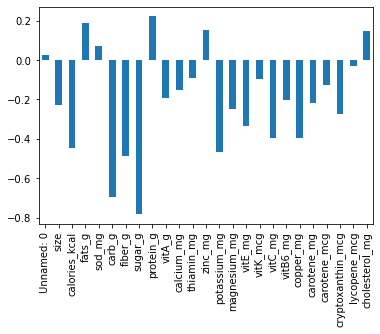

In [19]:
# menunjukkan nilai korelasi antara setiap kolom dengan kolom "quality"
# Nilai korelasi positif akan diwakili oleh batang dengan arah ke atas, sedangkan nilai korelasi negatif akan diwakili oleh batang dengan arah ke bawah
df.corr()['quality'][:-1].plot(kind='bar')

In [20]:
# Hitung korelasi berpasangan antara nutrisi yang berbeda
# tentang seberapa kuat hubungan linear antara masing-masing pasangan kolom nutrisi
correlation_matrix = df[nutrient_columns].corr()
print(correlation_matrix)

                   calories_kcal    fats_g    sod_mg    carb_g   fiber_g  \
calories_kcal           1.000000  0.549446  0.441335  0.785691  0.429748   
fats_g                  0.549446  1.000000  0.569106 -0.057810  0.021728   
sod_mg                  0.441335  0.569106  1.000000  0.101123  0.045425   
carb_g                  0.785691 -0.057810  0.101123  1.000000  0.528601   
fiber_g                 0.429748  0.021728  0.045425  0.528601  1.000000   
sugar_g                 0.486873 -0.195280 -0.115092  0.752657  0.290071   
protein_g               0.502743  0.826814  0.543353 -0.088184  0.033805   
vitA_g                  0.201098  0.094346  0.198012  0.159356  0.396173   
calcium_mg              0.422707  0.298666  0.224536  0.281686  0.253823   
thiamin_mg              0.296061  0.135896  0.109705  0.225188  0.116466   
zinc_mg                 0.489110  0.725327  0.480502 -0.035309  0.083184   
potassium_mg            0.590389  0.189963  0.254400  0.533576  0.660068   
magnesium_mg

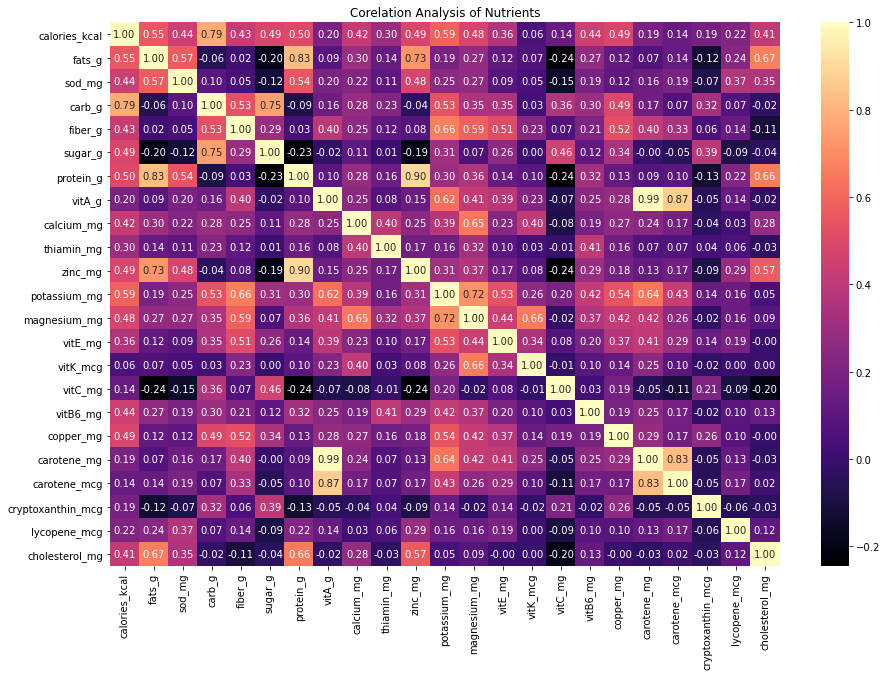

In [21]:
# heatmap akan diwarnai berdasarkan nilai korelasi antara pasangan kolom nutrisi yang sesuai.
# Warna dan intensitas warna pada heatmap akan merepresentasikan tingkat korelasi
# warna yang lebih terang menunjukkan korelasi yang lebih kuat 
# sedangkan warna yang lebih gelap menunjukkan korelasi yang lebih lemah 
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma', cbar=True)
plt.title("Corelation Analysis of Nutrients")
plt.show()

**splitting data**

In [22]:
# pembagian data menjadi data latih (training) dan data uji (testing)
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [23]:
print("Orginal training data : ", X.shape)
print("Original target value : ", y.shape)

print("Training Data", X_train.shape)
print("Target value (training) : ", y_train.shape)

print("Testing Data", X_test.shape)
print("Target value (testing) : ", y_test.shape)

Orginal training data :  (696, 25)
Original target value :  (696,)
Training Data (466, 25)
Target value (training) :  (466,)
Testing Data (230, 25)
Target value (testing) :  (230,)


**Model desicion tree**

In [24]:
# Hasil eksekusi koding ini digunakan untuk melakukan prediksi pada data uji atau data baru.
#  menemukan pola dan aturan untuk memprediksi nilai target (kelas) pada data baru.
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

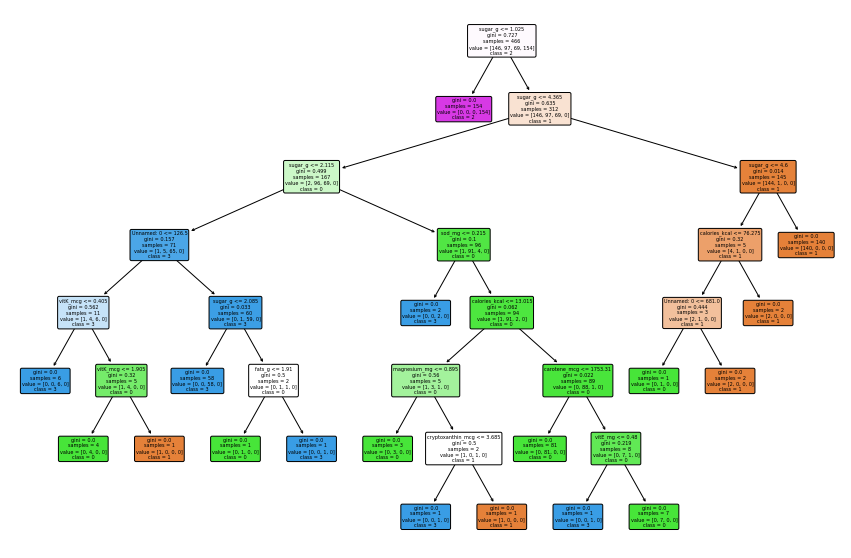

In [25]:
# Visualisasi desicion tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=X.columns,
            class_names=[str(label) for label in y.unique()],
            rounded=True, filled=True);
plt.show()

In [26]:
# overfitting dan underfitting
# mengevaluasi performa model Decision Tree yang telah dilatih pada data latih dan diuji pada data uji.
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9870


In [27]:
# Kemudian prediksi hasil dari data X_test
pred_dt = dt.predict(X_test)

# Lihat 10 Prediksi Pertama dan Nilai Aktualnya
print("Predicted:", pred_dt[0:10])
print("Actual:", y_test[0:10])

Predicted: [2 3 2 2 3 3 3 3 2 2]
Actual: 674    2
314    3
611    2
431    2
552    3
211    3
538    3
176    3
299    2
220    2
Name: quality, dtype: int64


**Evaluation Model**

In [28]:
# mengevaluasi kinerja model Decision Tree
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       0.98      0.96      0.97        45
           2       0.95      0.97      0.96        37
           3       1.00      1.00      1.00        82

    accuracy                           0.99       230
   macro avg       0.98      0.98      0.98       230
weighted avg       0.99      0.99      0.99       230



In [29]:
# mengevaluasi performa model klasifikasi dengan membandingkan nilai prediksi model
modDT = confusion_matrix(y_test, pred_dt)
print(modDT)


[[66  0  0  0]
 [ 0 43  2  0]
 [ 0  1 36  0]
 [ 0  0  0 82]]


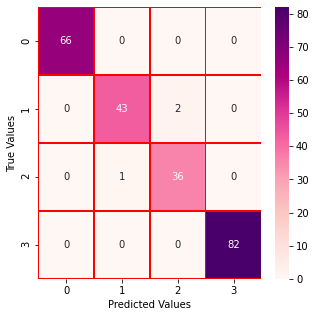

In [30]:
# Confusion Matrix 
# menghitung jumlah true positive (TP), false positive (FP), true negative (TN), dan false negative (FN).
# menampilkan confusion matrix bentuk heatmap, menunjukkan jumlah prediksi yang benar dan salah dari model.
# melihat polahubungan antara prediksi model nilaidataset uji. 
y_pred = dt.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
# Visualisasi Confusion Matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5,
            linecolor="red", fmt=".0f", ax=ax, cmap="RdPu")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [31]:
# Desicion Tree akurasi skor
acc_dt = accuracy_score(y_test, pred_dt)

print("Desicion Tree:", acc_dt)

Desicion Tree: 0.9869565217391304


Text(0.5, 1.0, 'Accuracy Score Desicion Tree: 0.9869565217391304')

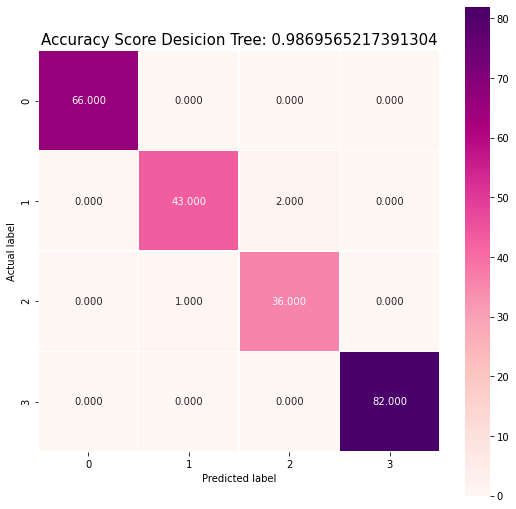

In [32]:
#  visualisasi heatmap dari confusion matrix yang memperlihatkan nilai aktual dan prediksi model Decision Tree untuk setiap kelas target
plt.figure(figsize=(9, 9))
sns.heatmap(modDT, annot=True, fmt=".3f", linewidths=.5,
            square=True, cmap='RdPu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score Desicion Tree: {0}'.format(acc_dt)
plt.title(all_sample_title, size=15)